In [64]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [9]:
w = 4.69
x_bar = 8.77
n = 100
t = w/(x_bar + 1/n)

def test_stat(xs):
    n = xs.shape[0]
    w = ((np.arange(n) + 1) * xs).sum() / (n * (n+1))
    x_bar = xs.mean()

    t = w/(x_bar + 1/n)
    return t

In [57]:
n_mc_samples = 10000
n = 100
t_threshold = 0.534

alphas = np.linspace(0, 8, 100)
ps = []
for alpha in alphas:
    xs = np.random.poisson(lam=alpha, size=(n_mc_samples, n))
    p = (np.array([test_stat(x) for x in xs]) >= t_threshold).mean()
    ps.append(p)

ps = pd.DataFrame(np.c_[alphas, ps], columns=['alpha','p']).set_index('alpha').p

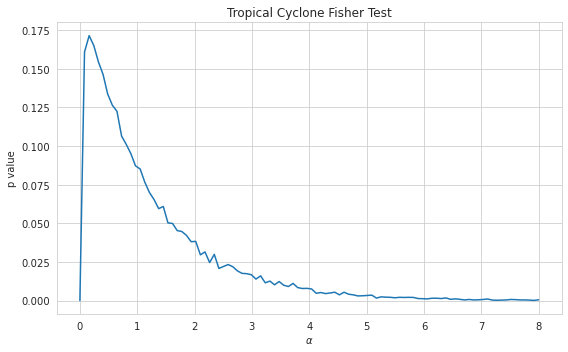

In [65]:
fig, ax = plt.subplots(figsize=(8, 5))

ps.plot()

ax.set_ylabel('p value')
ax.set_xlabel('$\\alpha$')
ax.set_title('Tropical Cyclone Fisher Test')

fig.tight_layout()
fig.show()

In [60]:
ps

alpha
0.000000    0.0000
0.080808    0.1609
0.161616    0.1715
0.242424    0.1651
0.323232    0.1545
             ...  
7.676768    0.0004
7.757576    0.0004
7.838384    0.0003
7.919192    0.0001
8.000000    0.0005
Name: p, Length: 100, dtype: float64